In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import root_pandas as rpd
from root_pandas import read_root
from matplotlib.patches import Rectangle
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})


Welcome to JupyROOT 6.22/06


# Systematic studies for Multidimensional (3D) Rh for Charged Pions
* This is made for the single pion analysis note version 2 to include systematic uncertainties in the multidimensional case.
* Also the same treatment is for Rh as a funtion of Pt2 (Cronin)

**Sector Dependency**

**$\pi^{+}$**

In [2]:
file_pip = TFile.Open('piplus_3d.root')

In [3]:
#Let's cretae dictionaries to save all the graphs
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
for sec in range(0,6):
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pip.Get('g_q2_%i_nu_%i_%s_sec%i'%(q2bin,nubin,tar,sec))
                y['%s_Q2_%ibin_nu_%ibin_sec_%i'%(tar,q2bin,nubin,sec)] =  np.array(data.GetY(),copy=True)
                data = file_pip.Get('err_nom_q2_%i_nu_%i_%s_sec%i'%(q2bin,nubin,tar,sec))
                erry['%s_Q2_%ibin_nu_%ibin_sec_%i'%(tar,q2bin,nubin,sec)] =  np.array(data.GetY(),copy=True)      

err_nom... is the error of the nominal case (all sectors together) so it doesn't matter wich sector we pick, all are the same

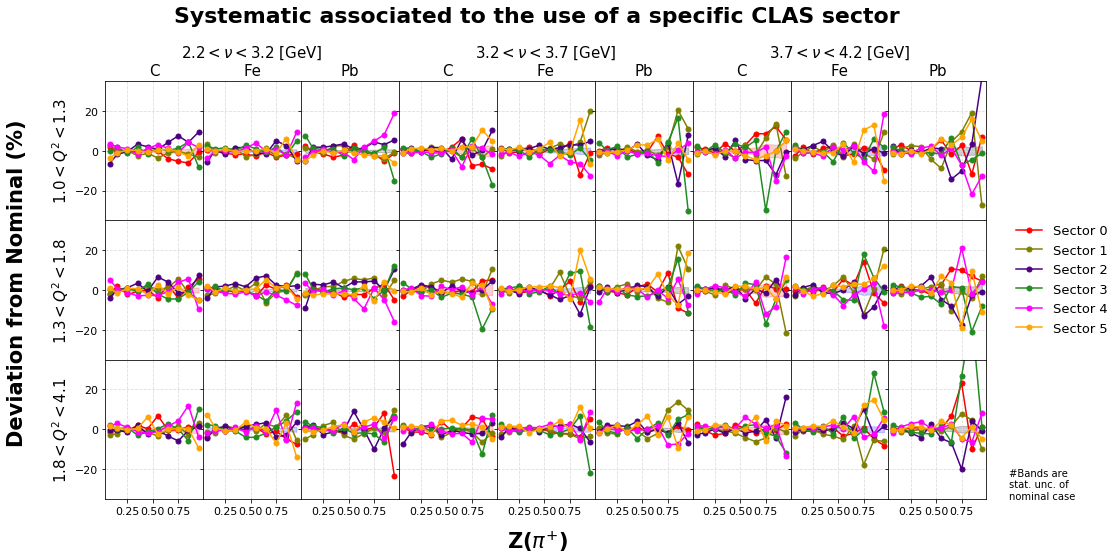

In [4]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_sec_0']*100,-erry[tmp+'_sec_0']*100,color=colorBands[i],alpha=0.2)
            for sec in range(0,6):
                name='%s_sec_%i'%(tmp,sec)
                if aux<6:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[sec],fmt='-o',ms=5,label='Sector %i'%sec)
                if aux>=6:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[sec],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{+}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=13, borderaxespad=0.3)

axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)

axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
plt.ylim(-35,35)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to the use of a specific CLAS sector', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_sector_piPlus.pdf', bbox_inches='tight')
plt.show()

**$\pi^{-}$**

In [5]:
file_pim = TFile.Open('piminus_3d.root')

In [6]:
#Let's cretae dictionaries to save all the graphs
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75])
for sec in range(0,6):
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pim.Get('g_q2_%i_nu_%i_%s_sec%i'%(q2bin,nubin,tar,sec))
                y['%s_Q2_%ibin_nu_%ibin_sec_%i'%(tar,q2bin,nubin,sec)] =  np.array(data.GetY(),copy=True)
                data = file_pim.Get('err_nom_q2_%i_nu_%i_%s_sec%i'%(q2bin,nubin,tar,sec))
                erry['%s_Q2_%ibin_nu_%ibin_sec_%i'%(tar,q2bin,nubin,sec)] =  np.array(data.GetY(),copy=True)  

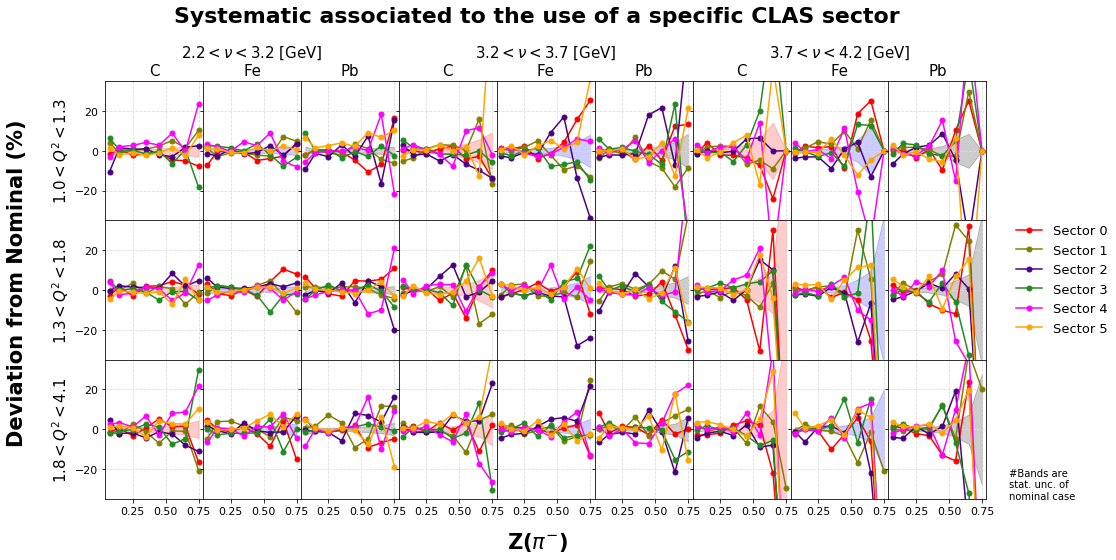

In [7]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_sec_0']*100,-erry[tmp+'_sec_0']*100,color=colorBands[i],alpha=0.2)
            for sec in range(0,6):
                name='%s_sec_%i'%(tmp,sec)
                if aux<6:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[sec],fmt='-o',ms=5,label='Sector %i'%sec)
                if aux>=6:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[sec],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{-}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=13, borderaxespad=0.3)

axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)

axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
plt.ylim(-35,35)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)

plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to the use of a specific CLAS sector', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_sector_piMinus.pdf', bbox_inches='tight')
plt.show()

**Vertex cuts Dependency**

**$\pi^{+}$**

In [8]:
file_pip = TFile.Open('piplus_3d_vc.root')

In [9]:
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
for i in ['RD','SM']:
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pip.Get('g_q2_%i_nu_%i_%s_VC%s'%(q2bin,nubin,tar,i))
                y['%s_Q2_%ibin_nu_%ibin_VC%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True)
                data = file_pip.Get('err_nom_q2_%i_nu_%i_%s_VC%s'%(q2bin,nubin,tar,i))
                erry['%s_Q2_%ibin_nu_%ibin_VC%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True) 

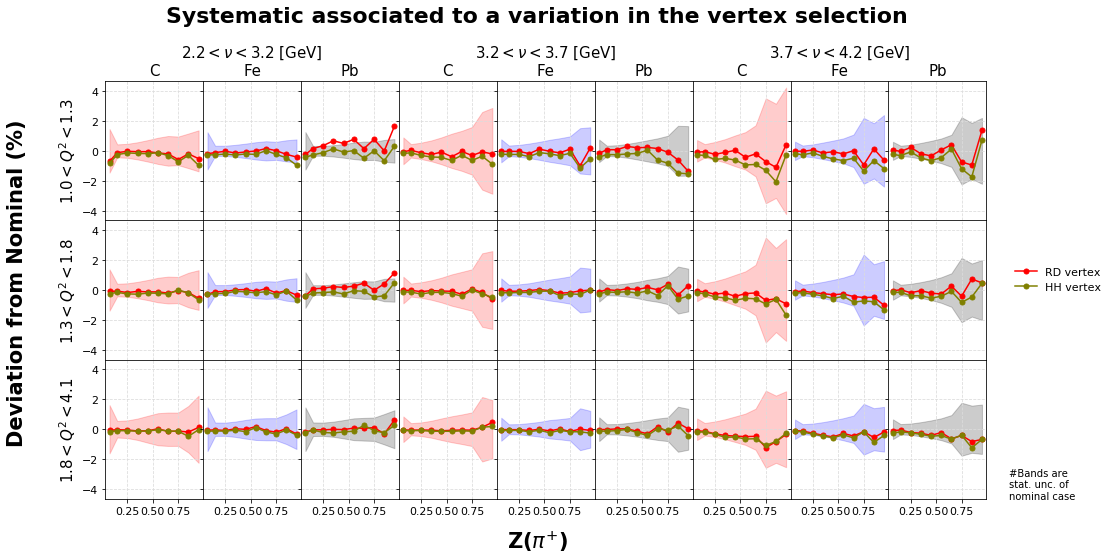

In [10]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
tmp_label=['RD','HH']
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_VCRD']*100,-erry[tmp+'_VCRD']*100,color=colorBands[i],alpha=0.2)
            for j,vc in enumerate(['RD','SM']):
                name='%s_VC%s'%(tmp,vc)
                if aux<2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5,label='%s vertex '%tmp_label[j])
                if aux>=2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{+}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=11)#bbox_to_anchor=(1.04,0.5), borderaxespad=1.93)
axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')

#fig.text(0.41, 0.25, 'CLAS PRELIMINARY', fontsize=30, va='center', rotation=20,fontweight="bold", color='gray', alpha=0.15)


axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
#plt.ylim(2.5,4.5)
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)
#axs[0,0].legend(bbox_to_anchor=(1.05,1))
plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to a variation in the vertex selection', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_VC_piPlus.pdf', bbox_inches='tight')
plt.show()

**$\pi^{-}$**

In [11]:
file_pim = TFile.Open('piminus_3d_vc.root')

In [12]:
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75])
for i in ['RD','SM']:
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pim.Get('g_q2_%i_nu_%i_%s_VC%s'%(q2bin,nubin,tar,i))
                y['%s_Q2_%ibin_nu_%ibin_VC%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True)
                data = file_pim.Get('err_nom_q2_%i_nu_%i_%s_VC%s'%(q2bin,nubin,tar,i))
                erry['%s_Q2_%ibin_nu_%ibin_VC%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True) 

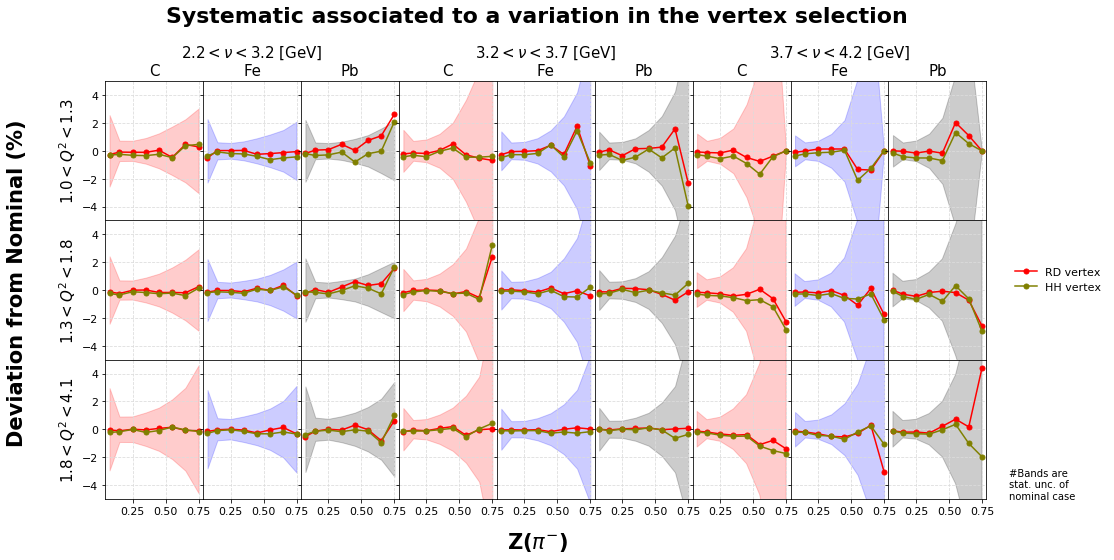

In [13]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
tmp_label=['RD','HH']
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_VCRD']*100,-erry[tmp+'_VCRD']*100,color=colorBands[i],alpha=0.2)
            for j,vc in enumerate(['RD','SM']):
                name='%s_VC%s'%(tmp,vc)
                if aux<2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5,label='%s vertex '%tmp_label[j])
                if aux>=2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{-}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=11)#bbox_to_anchor=(1.04,0.5), borderaxespad=1.93)
axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')

#fig.text(0.41, 0.25, 'CLAS PRELIMINARY', fontsize=30, va='center', rotation=20,fontweight="bold", color='gray', alpha=0.15)


axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
plt.ylim(-5,5)
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)
#axs[0,0].legend(bbox_to_anchor=(1.05,1))
plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to a variation in the vertex selection', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_VC_piMinus.pdf', bbox_inches='tight')
plt.show()

**$\Delta Z$ Dependency**

**$\pi^{+}$**

In [14]:
file_pip = TFile.Open('piplus_3d_deltaZ.root')

In [15]:
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
for i in ['25','35']:
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pip.Get('g_q2_%i_nu_%i_%s_deltaZ%s'%(q2bin,nubin,tar,i))
                y['%s_Q2_%ibin_nu_%ibin_deltaZ%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True)
                data = file_pip.Get('err_nom_q2_%i_nu_%i_%s_deltaZ%s'%(q2bin,nubin,tar,i))
                erry['%s_Q2_%ibin_nu_%ibin_deltaZ%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True) 

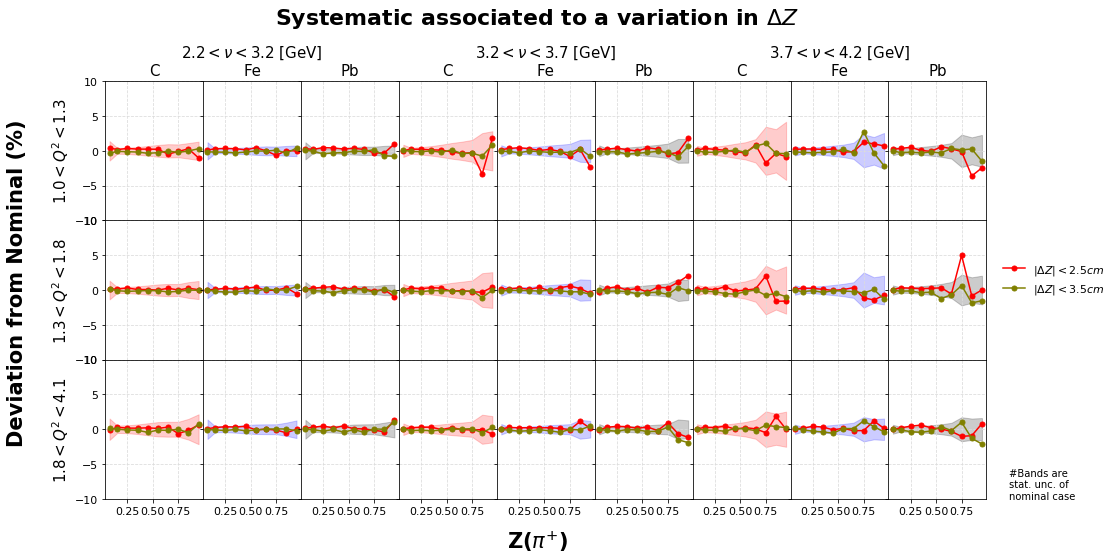

In [16]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
tmp_label=['2.5','3.5']
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_deltaZ35']*100,-erry[tmp+'_deltaZ35']*100,color=colorBands[i],alpha=0.2)
            for j,delta in enumerate(['25','35']):
                name='%s_deltaZ%s'%(tmp,delta)
                if aux<2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5,label='|$\Delta Z| <%s cm$'%tmp_label[j])
                if aux>=2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{+}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=11)#bbox_to_anchor=(1.04,0.5), borderaxespad=1.93)
axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')
axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
plt.ylim(-10,10)
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)
#axs[0,0].legend(bbox_to_anchor=(1.05,1))
plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to a variation in $\Delta Z$', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_deltaZ_piPlus.pdf', bbox_inches='tight')
plt.show()

**$\pi^{-}$**

In [17]:
file_pim = TFile.Open('piminus_3d_deltaZ.root')

In [18]:
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75])
for i in ['25','35']:
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pim.Get('g_q2_%i_nu_%i_%s_deltaZ%s'%(q2bin,nubin,tar,i))
                y['%s_Q2_%ibin_nu_%ibin_deltaZ%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True)
                data = file_pim.Get('err_nom_q2_%i_nu_%i_%s_deltaZ%s'%(q2bin,nubin,tar,i))
                erry['%s_Q2_%ibin_nu_%ibin_deltaZ%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True)  

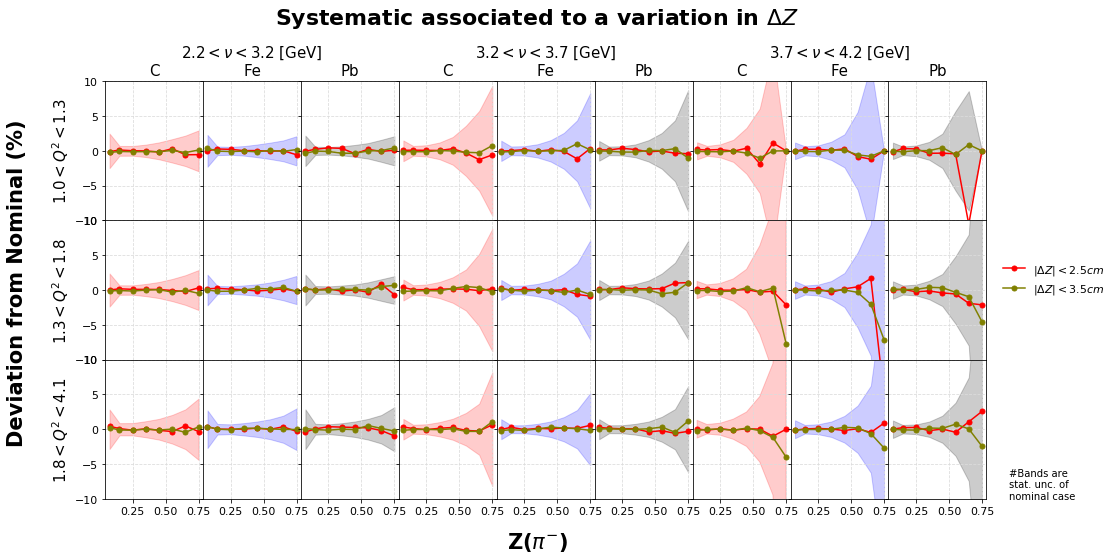

In [19]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
tmp_label=['2.5','3.5']
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_deltaZ35']*100,-erry[tmp+'_deltaZ35']*100,color=colorBands[i],alpha=0.2)
            for j,delta in enumerate(['25','35']):
                name='%s_deltaZ%s'%(tmp,delta)
                if aux<2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5,label='|$\Delta Z| <%s cm$'%tmp_label[j])
                if aux>=2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{-}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=11)#bbox_to_anchor=(1.04,0.5), borderaxespad=1.93)

axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')
axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
plt.ylim(-10,10)
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)
#axs[0,0].legend(bbox_to_anchor=(1.05,1))
plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to a variation in $\Delta Z$', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_deltaZ_piMinus.png', bbox_inches='tight')
plt.show()

**Momentum threshold cut for $\pi^{+}$, above this value CC cuts are used (in addition to TOF)**

In [33]:
file_pip = TFile.Open('piplus_3d_P_threshold.root')

In [34]:
y = {}
erry={}
x = np.array([0.075,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
for i in ['25','30']:
    for nubin in range(1,4):
        for q2bin in range (1,4):
            for tar in  ['C','Fe','Pb']:
                data = file_pip.Get('g_q2_%i_nu_%i_%s_P%s'%(q2bin,nubin,tar,i))
                y['%s_Q2_%ibin_nu_%ibin_P%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True)
                data = file_pip.Get('err_nom_q2_%i_nu_%i_%s_P%s'%(q2bin,nubin,tar,i))
                erry['%s_Q2_%ibin_nu_%ibin_P%s'%(tar,q2bin,nubin,i)] =  np.array(data.GetY(),copy=True) 

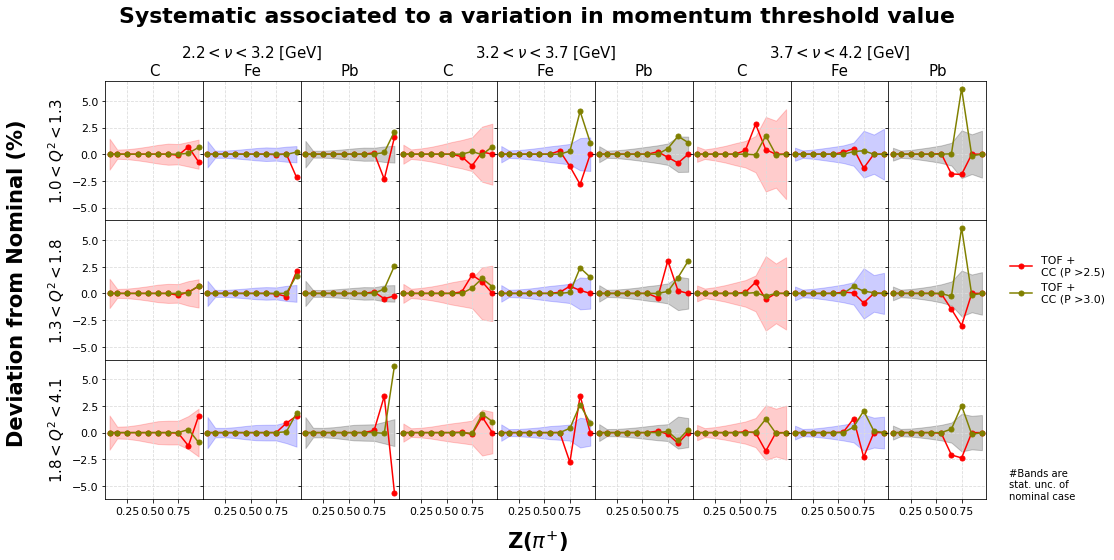

In [36]:
colors=['red','olive','indigo','forestgreen' ,'magenta' , 'orange'  ]
colorBands=['red','blue','black']
fig, axs = plt.subplots(3, 9,sharex=True, sharey=True,figsize=(16,8),gridspec_kw={'hspace': 0., 'wspace':0.})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))
tmp_label=['2.5','3.0']
aux=0 ## variable defined just to have a proper legend
for q2_bin in range(1,4):
    for nu_bin in range(1,4):
        for i,tar in enumerate(['C','Fe','Pb']):
            tmp='%s_Q2_%ibin_nu_%ibin'%(tar,q2_bin,nu_bin)
            axs[q2_bin-1,i+3*(nu_bin-1)].fill_between(x, erry[tmp+'_P25']*100,-erry[tmp+'_P25']*100,color=colorBands[i],alpha=0.2)
            for j,delta in enumerate(['25','30']):
                name='%s_P%s'%(tmp,delta)
                if aux<2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5,label='TOF + \nCC (P >%s)'%tmp_label[j])
                if aux>=2:
                    axs[q2_bin-1,i+3*(nu_bin-1)].errorbar(x,y[name],color=colors[j],fmt='-o',ms=5)
                aux=aux+1
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="x",color='gainsboro', linestyle='dashed')
                axs[q2_bin-1,i+3*(nu_bin-1)].grid(axis="y",color='gainsboro', linestyle='dashed')
nulabel = {}
nulabel['bin_1'] = r'$2.2 < \nu < 3.2$ [GeV]'
nulabel['bin_2'] = r'$3.2 < \nu < 3.7$ [GeV]'
nulabel['bin_3'] = r'$3.7 < \nu < 4.2$ [GeV]'

fig.text(0.5, 0.04, 'Z($\pi^{+}$)', ha='center',fontsize=21,fontweight="bold")
fig.text(0.04, 0.5, 'Deviation from Nominal (%)', va='center', rotation='vertical',fontsize=21,fontweight="bold")
axs[0,0].set_ylabel('$1.0<Q^{2}<1.3$',fontsize=15)
axs[1,0].set_ylabel('$1.3<Q^{2}<1.8$',fontsize=15)
axs[2,0].set_ylabel('$1.8<Q^{2}<4.1$',fontsize=15)
fig.legend(loc='center right',ncol=1,frameon=False,fontsize=11)#bbox_to_anchor=(1.04,0.5), borderaxespad=1.93)
axs[0,1].set_title(nulabel['bin_1']+ '\nFe',fontsize=15)
axs[0,4].set_title(nulabel['bin_2']+ '\nFe',fontsize=15)
axs[0,7].set_title(nulabel['bin_3']+ '\nFe',fontsize=15)
fig.text(0.91, 0.15, '#Bands are \nstat. unc. of \nnominal case', fontsize=10, va='center')
axs[0,0].set_title('C',fontsize=15)
axs[0,3].set_title('C',fontsize=15)
axs[0,6].set_title('C',fontsize=15)
axs[0,2].set_title('Pb',fontsize=15)
axs[0,5].set_title('Pb',fontsize=15)
axs[0,8].set_title('Pb',fontsize=15)
#plt.ylim(-10,10)
for j in range(0,3):    axs[j,0].tick_params(axis='y', which='major', labelsize=11)
for j in range(0,9):    axs[2,j].tick_params(axis='both', which='major', labelsize=11)
#axs[0,0].legend(bbox_to_anchor=(1.05,1))
plt.subplots_adjust(right=0.89, top=0.85)
fig.suptitle('Systematic associated to a variation in momentum threshold value', fontsize=22,fontweight="bold")
plt.savefig('Multidifferential_P_threshold_piPlus.pdf', bbox_inches='tight')
plt.show()

**Nphe threshold cut for $\pi^{+}$**

**CC Matching Mirror instead of Nphe**

**Fiducial Cuts**

**Sampling Fraction Cut**

# Cronin-like Case